In [45]:
import cv2 as cv
from matplotlib import pyplot as plt
import os
from pathlib import Path

In [1]:
DL = (777, 1029)
DR = (1229, 1029)
UR = (1229, 329)
UL = (777, 329)

In [4]:
! dir ..\

 Volume in drive C is OS
 Volume Serial Number is 82B6-8A8B

 Directory of c:\SagarIsland

08/13/2022  10:21 PM    <DIR>          .
08/13/2022  10:21 PM    <DIR>          ..
08/08/2022  11:08 PM         1,244,968 1-s2.0-S1364815219300490-main.pdf
08/08/2022  11:22 AM    <DIR>          coastSat
08/13/2022  10:30 PM    <DIR>          Notebooks
08/13/2022  10:23 PM    <DIR>          SagarIslandImages
               1 File(s)      1,244,968 bytes
               5 Dir(s)  693,307,744,256 bytes free


In [52]:
dst_path = "../SagarIslandImages"

In [53]:
mndwi_images = ["../SagarIslandImages/mndwi_1990.png", "../SagarIslandImages/mndwi_2000.png", "../SagarIslandImages/mndwi_2010.png","../SagarIslandImages/mndwi_2020.png"]

#### Creates the directory for the detected coastlines

In [54]:
try:
    if not os.path.isdir(os.path.join(dst_path, 'shorelines')):
        os.mkdir(os.path.join(dst_path, 'shorelines'))
except e:
    print(f'impossible to create directory {e}.') 


#### Iters over source mndwi images and detects edges, which should be the coastlines

In [59]:
for im_path in mndwi_images :
    img = cv.imread(im_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
    img = img[329:1029,777:1229] # restricting to the region of interest
    edges = cv.Canny(img,100,200)
    edge_name = Path(im_path).stem+'_shoreline.png'
    cv.imwrite(os.path.join(dst_path, 'shorelines', edge_name), edges)

#### Example of coastline detection

In [82]:
src_img = cv.imread("../SagarIslandImages/mndwi_2010.png")
src_img = cv.cvtColor(src_img, cv.COLOR_BGR2RGB)
src_img = src_img[329:1029,777:1229, :]
edges = cv.imread("../SagarIslandImages/shorelines/mndwi_2010_shoreline.png")
edges = cv.cvtColor(edges, cv.COLOR_BGR2RGB)

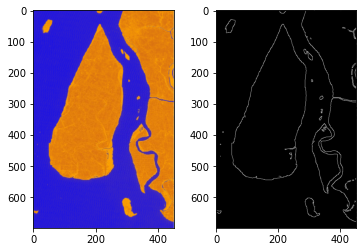

In [83]:
f, axes = plt.subplots(1, 2)
axes[0].imshow(src_img)
axes[1].imshow(edges)
